In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

### 데이터 불러오기

In [64]:
df_raw = pd.read_csv("./data/DIABETEST.csv", encoding = '949')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### 목표변슈(Y)제거 후 따로 저장, 설명변수와 목표변수 분리

In [65]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)
df_raw_x.head()

,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### 데이터 분할(devied train & test by x,y 7:3비율로 뽀개기)

In [66]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


### 모델생성
- 기본 옵션으로 트리 생성

In [67]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on trainning set : 0.892
Score on test set : 0.393


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


> test set의 데이터가 설명력이 매우 낮음 : `과대적합`

In [68]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### 트리 갯수 변경에 따른 모델 성능

In [69]:
train_score = [];test_score=[]
para_n_tree = [n_tree * 5 for n_tree in range(1,100)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [70]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,5,0.839,0.281
1,10,0.892,0.393
2,15,0.905,0.413
3,20,0.908,0.404
4,25,0.909,0.423
5,30,0.908,0.432
6,35,0.910,0.443
7,40,0.911,0.442
8,45,0.914,0.448
9,50,0.914,0.458


> n_estimator가 50일때, 트리의 수가 50일 때, TestScore의 값이 좋게 나온다

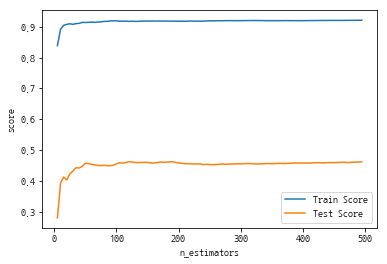

In [71]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

### Leaf Node 의 최소 자료 수 변경에 따른 모델 성능

In [72]:
train_score = [];test_score=[]
para_leaf = [n_tree * 1 for n_tree in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120,
                              min_samples_leaf = v_min_samples_leaf)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [73]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.917,0.463
1,2,0.882,0.470
2,3,0.833,0.477
3,4,0.787,0.474
4,5,0.751,0.472
5,6,0.718,0.475
6,7,0.694,0.480
7,8,0.671,0.479
8,9,0.651,0.483
9,10,0.633,0.479


> leaf node가 `15개` 일 때, test score의 값이 좋기 때문에 `적어도 leaf node가 15`는 되야됨

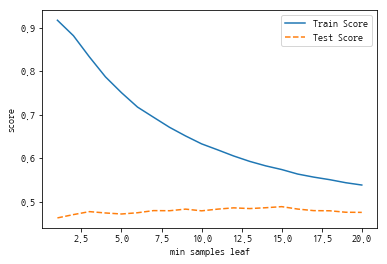

In [74]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

### 분리노드(Splite)의 최소 자료 수 변경에 따른 모델 성능

In [75]:
train_score = [];test_score=[]
para_split = [n_tree * 2 for n_tree in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120, min_samples_leaf = 15,
                              min_samples_split = v_min_samples_split)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#저장
df_score_split = pd.DataFrame()
df_score_split['n_Splite'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,n_Splite,TrainScore,TestScore
0,4,0.574,0.489
1,6,0.574,0.489
2,8,0.574,0.489
3,10,0.574,0.489
4,12,0.574,0.489
5,14,0.574,0.489
6,16,0.574,0.489
7,18,0.574,0.489
8,20,0.574,0.489
9,22,0.574,0.489


> 최소로 4번 정도 분할하면 적절하다

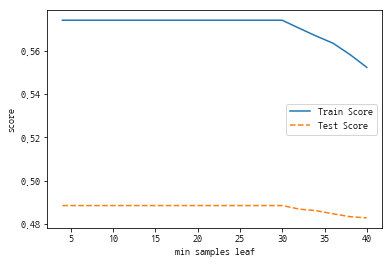

In [76]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

### 최대깊이 변경에 따른 모델 성능

In [77]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 120,
                              min_samples_leaf = 15, min_samples_split = 4,
                              max_depth = v_max_depth)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.387,0.403
1,2,0.488,0.472
2,3,0.544,0.494
3,4,0.566,0.490
4,5,0.573,0.489
5,6,0.574,0.489
6,7,0.574,0.489
7,8,0.574,0.489
8,9,0.574,0.489
9,10,0.574,0.489


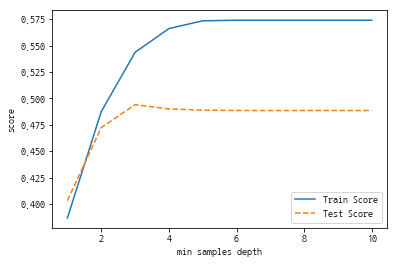

In [86]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples depth')
plt.legend()

> Depth가 3일 때 TestScore의 값이 가장 좋음

### 결과도출

In [79]:
rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 120, min_samples_leaf = 15,
                                min_samples_split = 4, max_depth = 3)
rf_final.fit(df_train_x, df_train_y)
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

rf_final

Score on training set : 0.544
Score on test set : 0.494


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

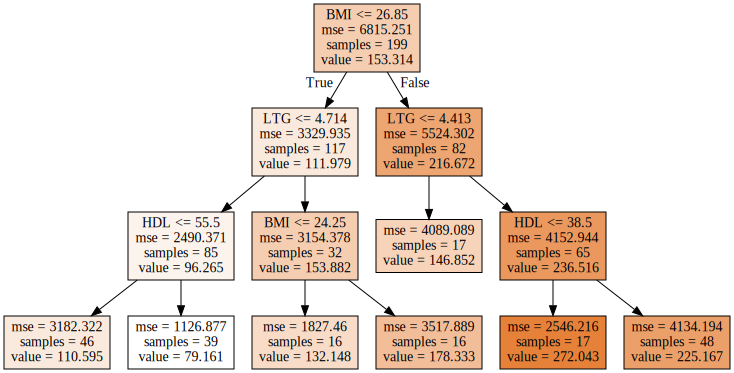

In [80]:
v_feature_names = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file = 'rfr_final_0.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

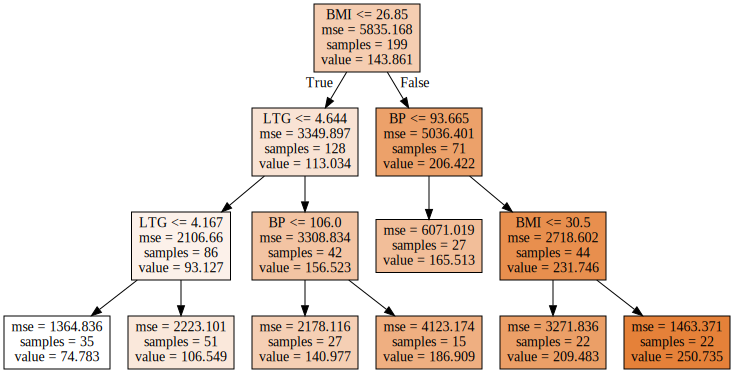

In [81]:
export_graphviz(rf_final.estimators_[1], out_file = 'rfr_final_1.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

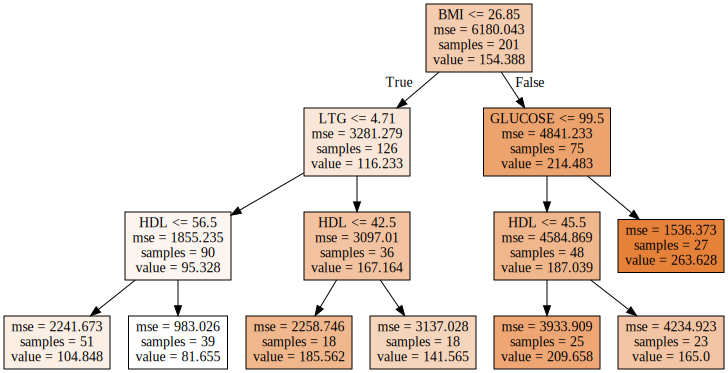

In [82]:
export_graphviz(rf_final.estimators_[10], out_file = 'rfr_final_10.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [83]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.455
8,LTG,0.375
9,GLUCOSE,0.060
3,BP,0.052
6,HDL,0.033
7,TCH,0.008
5,LDL,0.006
0,AGE,0.005
4,CHOLESTEROL,0.004
1,GENDER,0.002


Text(0, 0.5, '변수')

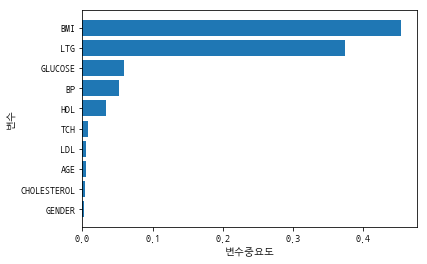

In [84]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [85]:
estimator = RandomForestRegressor(random_state = 1234)

#구하고자 하는 parameter와 범위
param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n {}'.format(grid_dt.best_estimator_))
print('\n nbest parameter : \n {}'.format(grid_dt.best_params_))
print('\n best score: \n {}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=36,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

 nbest parameter : 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 36}

 best score: 
 0.383


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
